# Fundamentos de Álgebra Lineal

Liberías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Conceptos básicos

![](tensor.png)

**Escalar**

En matemáticas un escalar no es más que un número pero en Python un escalar puede ser un entero, un punto flotante, incluso un texto, el elemento nada o un booleano.

In [1]:
escalarPython = True
print(type(escalarPython))

<class 'bool'>


**Vector**

Un vector es un conjunto de números, un arreglo que nos da un grado de libertad.

In [3]:
vector = np.array([1, 2, 3, 4])
vector

array([1, 2, 3, 4])

**Matriz**

Una matriz es la combinación de varios vectores y nos da dos grados de libertad.

In [4]:
matriz = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
matriz

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

**Tensor**

Un tensor es la combinación de varias matrices y nos da tres o más grados de libertad. Si una matriz podría ser la representación de una imagen entonces un tensor sería la representación de la imagen a lo largo del tiempo, o sea, un video.

In [5]:
tensor = np.array([
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ],
    [
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]
    ],
    [
        [19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]
    ]
])
tensor

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

Lo que representamos dentro de los vectores, matrices o tensores depende de quien esté generando la información.

Por ejemplo, supongamos que los elementos contenidos en nuestro tensor corresponden a una imagen así que vamos a graficarla.

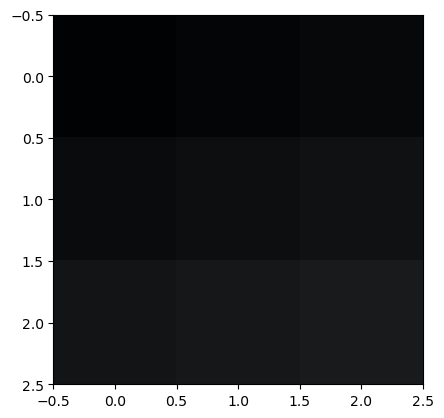

In [7]:
%matplotlib inline
# Mostar el tensor utilizando la interpolación del más cercano 
plt.imshow(tensor, interpolation = "nearest")
plt.show()

Vemos que tenemos varios tonos de negro y esto es porque nuestros valores del tensor representan valores RGB.

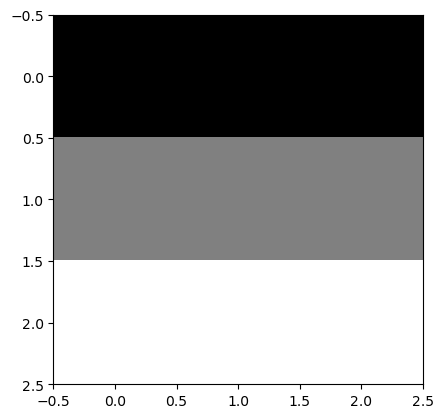

In [8]:
tensor2 = np.array([
    [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ],
    [
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]
    ],
    [
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]
    ]
])
plt.imshow(tensor2, interpolation = "nearest")
plt.show()

### Dimensiones

Los escalares no tienen el atributo *shape*.

In [10]:
escalar = 5.123
escalar.shape

AttributeError: 'float' object has no attribute 'shape'

Cuando usamos *shape* con un vector nos devuelve (x,) donde x nos indica la cantidad de elementos (en el sentido de una fila) que tiene el vector.

In [9]:
vector.shape

(4,)

Cuando utilizamos *shape* con una matriz nos devuelve la cantidad de filas que tiene la matriz y la cantidad de columnas.

In [12]:
matriz.shape

(3, 3)

Con un tensor *shape* nos regresa la cantidad de matrices que hay en el tensor, el número de filas de las matrices y el número de columnas de las matrices.

In [13]:
tensor.shape

(3, 3, 3)

Utilizando *size* podemos saber la cantidad de elementos que contiene un tensor, matriz, etc.

In [14]:
tensor.size

27

### Transposición

Transponer un vector o una matriz es intercambiar las filas por las columnas. Podemos hacer esto utilizando *.T*

Como los escalares no tienen ni filas ni columnas entonces no podemos obtener su transpuesta.

In [15]:
escalarT = escalar.T

AttributeError: 'float' object has no attribute 'T'

Para los vectores no vemos un cambio pero realmente pasamos de tener un vector fila a tener un vector columna.

In [20]:
vectorT = vector.T
vectorT

array([1, 2, 3, 4])

In [21]:
matrizT = matriz.T
matrizT

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

Para los tensores también tenemos la transposición y lo que hace es pasar de mXnXp a pXnXm

In [22]:
tensorT = tensor.T
tensorT

array([[[ 1, 10, 19],
        [ 4, 13, 22],
        [ 7, 16, 25]],

       [[ 2, 11, 20],
        [ 5, 14, 23],
        [ 8, 17, 26]],

       [[ 3, 12, 21],
        [ 6, 15, 24],
        [ 9, 18, 27]]])

La transpuesta de la transpuesta es el objeto original.

In [23]:
matrizTT = matrizT.T
matrizTT

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Suma de matrices

La suma de matrices está definida cuando dos objetos tienen la misma dimensión y lo que se hace es sumar elemento con elemento.

In [25]:
matriz + matrizT

array([[ 2,  6, 10],
       [ 6, 10, 14],
       [10, 14, 18]])

#### Suma de matrices con escalares

Al sumar una matriz con un escalar el resultado que obtendremos será la matriz donde a cada elemento se le sumó el escalar.

In [26]:
matriz + escalar

array([[ 6.123,  7.123,  8.123],
       [ 9.123, 10.123, 11.123],
       [12.123, 13.123, 14.123]])

#### Suma de matrices y vectores con broadcasting

El proceso de broadcasting consiste en extender la matriz o el vector de menor tamaño para que se ajuste al del mayor tamaño.

In [5]:
escalar = 5.679
vector = np.array([2, 3])
matriz = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

Si tratamos de sumar un vector fila de 3 elementos con una matriz de 3 filas y 2 columnas no es posible hacer el broadcasting  ya que no hay forma de hacer un emparejamiento.

In [30]:
matriz + vector

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Por otro lado, si utilizamos la matriz transpuesta que pasa a tener 2 filas y 3 columnas entonces es posible hacer un emparejamiento donde el vector de 3 elementos se repite para sumar cada elemento a la matriz para sus 2 filas.

![](broadcasting.PNG)

In [29]:
matriz.T + vector

array([[ 4,  7, 10],
       [ 5,  8, 11]])

Cuando sumamos una matriz con un escalar estamos haciendo este mismo procedimiento.

## Operaciones con matrices

### Producto punto entre matriz y vector

In [8]:
matriz.dot(vector.T)

array([ 8, 18, 28])

### Producto punto entre dos matrices

In [9]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
B = np.array([
    [2, 3],
    [5, 7],
    [11, 13]
])
np.dot(A, B)

array([[ 45,  56],
       [ 99, 125],
       [153, 194],
       [207, 263]])

### Propiedades de la multiplicación de matrices

**Asociativa**: AxBxC = Ax(BxC) = (AxB)xC

**Distributiva**: Ax(B+C) = AxB + AxC

**Conmutativa**: NO es conmutativa, o sea, AxB != BxA (para vectores sí es conmutativa)

In [11]:
A = np.array([
    [2, 3],
    [5, 7],
    [11, 13]
    ])
B = np.array([
    [1, 3],
    [2, 1]
    ])
C = np.array([
    [3, 1],
    [4, 2]
    ])

In [12]:
# Asociativa
print(A.dot(B.dot(C)))
print(A.dot(B).dot(C))

[[ 60  26]
 [145  63]
 [295 129]]
[[ 60  26]
 [145  63]
 [295 129]]


In [13]:
# Distributiva
print(A.dot(B + C))
print(A.dot(B) + A.dot(C))

[[ 26  17]
 [ 62  41]
 [122  83]]
[[ 26  17]
 [ 62  41]
 [122  83]]


In [14]:
# Conmutativa
print(A.dot(B))
print(B.dot(A))

[[ 8  9]
 [19 22]
 [37 46]]


ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

### Transposición de un producto de matrices

(AxB)T = BTxAT

In [15]:
(A.dot(B)).T

array([[ 8, 19, 37],
       [ 9, 22, 46]])

In [16]:
B.T.dot(A.T)

array([[ 8, 19, 37],
       [ 9, 22, 46]])

In [18]:
print(A)
print(A.T.T)

[[ 2  3]
 [ 5  7]
 [11 13]]
[[ 2  3]
 [ 5  7]
 [11 13]]


### Matrices especiales

#### Matriz identidad

Es el elemento neutro de la multiplicación de matrices, es decir, cualquier matriz multiplicada por la matriz identidad resulta la misma matriz. Para generar una matriz identidad de nxn en python se usa *np.eye(n)*.

In [3]:
A = np.eye(3)
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Matriz inversa

Una matriz es inversa de otra cuando la multiplicación de las matrices resulta en una matriz identidad (elemento inverso de la multiplicación de matrices). Utilizamos *np.linalg.inv(A)*.

$A A^{-1} = I$

In [4]:
inversaA = np.linalg.inv(A)
inversaA

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Matriz singular

Una matriz es singular cuando no tiene matriz inversa. Todas las matrices que no son cuadradas son singulares. Si el determinante de la matriz es diferente de cero, tiene inversa; si el determinante de la matriz es cero, no tiene inversa.

In [5]:
singular = np.array([
    [1, 1],
    [1, 1]
])
np.linalg.inv(singular)

LinAlgError: Singular matrix

### Aplicación de la inversa de una matriz para resolver un sistema de ecuaciones lineales

![](despeje.jpg)

In [7]:
A = np.array([
    [3, 1],
    [2, 1]
    ])
b = np.array([
    [1],
    [1]
    ])

# Utilizamos esto para que redondee a 0 cuando el resultado es muuuy cercano a este
np.set_printoptions(suppress = True)

# Sacamos la inversa de A
inversaA = np.linalg.inv(A)
# Hacemos el despeje
x = inversaA.dot(b)
x

array([[0.],
       [1.]])

### Sistemas de ecuaciones lineales

Los sistemas de ecuaciones lineales pueden no tener solución, tener una única solución o tener infinitas soluciones.

- Incompatible o sobredeterminado: cuando no hay soluciones para el sistema. Hay más ecuaciones que incógnitas.
- Compatible determinado: cuando el sistema tiene una única solución. Hay tantas ecuaciones como incógnitas (convergen en un sólo punto).
- Compatible indeterminado: cuando hay infinitas soluciones. Hay menos ecuaciones que incógnitas.

![](Sistema%2Bcompatible%2Bdeterminado%2BSistema%2Bcompatible%2Bindeterminado.jpg)

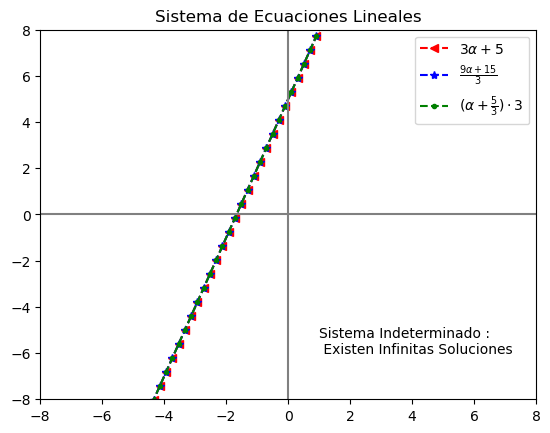

In [2]:
# Sistema  de Ecuaciones Indeterminado
X = np.linspace(-10,10,100)

Y1 = 3*X + 5
Y2 = (9*X + 15)/3
Y3 = ( X + (5/3))*3

plt.figure()
plt.title('Sistema de Ecuaciones Lineales')
plt.plot(X,Y1,'r--', label=r'$ 3\alpha + 5$', marker='<')
plt.plot(X,Y2,'b--', label=r'$ \frac{9\alpha + 15}{3} $', marker='*')
plt.plot(X,Y3,'g--', label=r'$ (\alpha + \frac{5}{3})\cdot 3 $', marker='.')
plt.legend()
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.text(1,-6,'Sistema Indeterminado :\n Existen Infinitas Soluciones')

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()

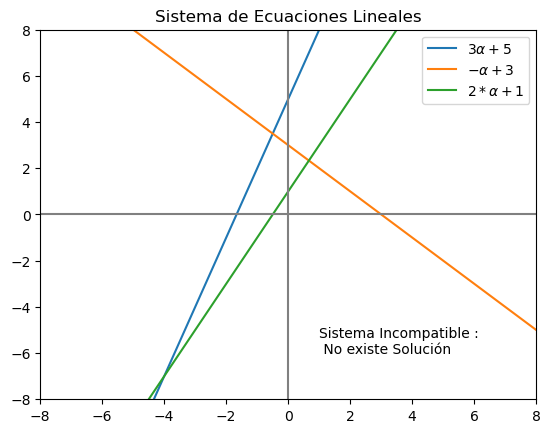

In [3]:
# Sistema  de Ecuaciones Incompatible
X = np.linspace(-10,10,100)

Y1 = 3*X + 5
Y2 = -X + 3
Y3 = 2*X + 1

plt.figure()
plt.title('Sistema de Ecuaciones Lineales')
plt.plot(X,Y1, label=r'$ 3\alpha + 5$')
plt.plot(X,Y2, label=r'$ -\alpha + 3 $')
plt.plot(X,Y3, label=r'$ 2*\alpha + 1$')
plt.legend()
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.text(1,-6,'Sistema Incompatible :\n No existe Solución')

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()

### Graficar vectores

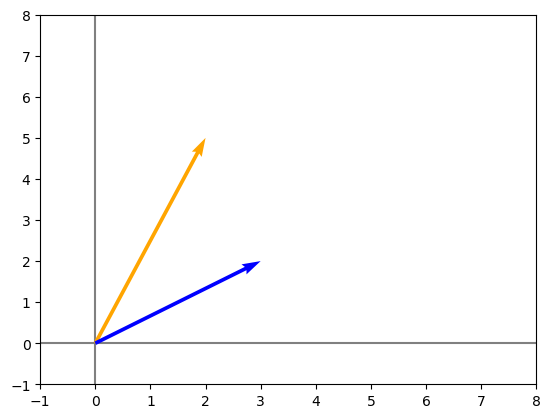

In [14]:
vector1 = np.array([2, 5])
vector2 = np.array([3, 2])

# Definimos la función para graficar vectores
def graficarVectores(vectores, colores, alpha = 1):
    # Creamos una figura
    plt.figure()
    # Agregamos el eje vertical
    plt.axvline(x = 0, color = "grey", zorder = 0)
    # Agregamos el eje horizontal
    plt.axhline(y = 0, color = "grey", zorder = 0)
    
    # Recorremos cada vector uno por uno
    for i in range(len(vectores)):
        # Concatenamos el vector con el valor (0, 0) ya que es el origen
        x = np.concatenate([
            [0, 0],
            vectores[i]
        ])
        # Graficamos el vector
        plt.quiver([x[0]],
                  [x[1]],
                  [x[2]],
                  [x[3]],
                  # Ángulos definimos como xy al igual que la unidad de escala
                  angles = 'xy', scale_units = 'xy', scale = 1, 
                  color = colores[i], alpha = alpha)
        
graficarVectores([vector1, vector2], ["orange", "blue"])
plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.show()

### Combinaciones lineales

La combinación lineal de vectores nos dice que podemos representar un vector en un espacio $R^n$ como la combinación de dos o más vectores multiplicados por un escalar.

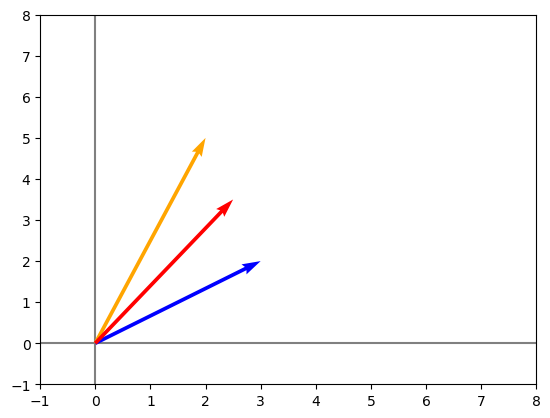

In [7]:
vector1 = np.array([2, 5])
vector2 = np.array([3, 2])

combLineal = (1 / 2 * vector1) + (1 / 2 * vector2)
graficarVectores([vector1, vector2, combLineal], ["orange", "blue", "red"])
plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.show()

### Espacios y subespacios

El espacio euclidiano o espacio vectorial es el conjunto de n-adas ordenadas, tambien conocido por espacio n-dimencional y se denota por $R^n$.

- **R1**: espacio unidimensional, línea recta real.
- **R2**: espacio bidimensional, pares ordenados.
- **R3**: espacio tridimensional, terna ordenadas.
- **Hiperplano**: una dimension menos respecto al espacio donde estamos trabajando: si trabajamos en R3 un hiperplano es R2, si trabajamos en R2 un hiperplano es la recta.

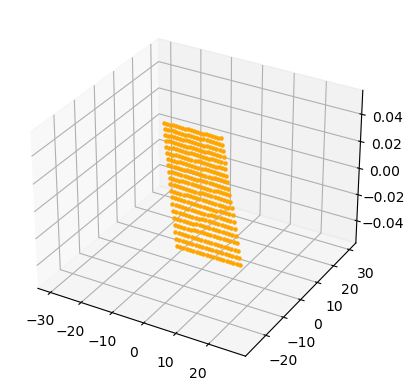

In [9]:
v1 = np.array([1, 0, 0])
v2 = np.array([2, -3, 0])

fig = plt.figure()
ax = plt.axes(projection = '3d')

for a in range (-10, 10):
  for b in range (-10, 10):
    ax.scatter(v1[0] * a + v2[0] * b,
               v1[1] * a + v2[1] * b,
               v1[2] * a + v2[2] * b,
               marker = '.',
               color = "orange")
plt.show()

### Vectores linealmente independientes

El espacio $R^n$ puede ser generado a partir de $n$ vectores de dimensión $n$ y uno de los requisitos para que esto ocurra es que dichos vectores deben ser linealmente independientes. Se dice que dos vectores $v_1$ y $v_2$ son linealmente independientes si su combinación lineal es siempre diferente de cero. Por ejemplo, tenemos en $R^2$ dos vectores $v_1$ y $v_2$ y estos serán linealmente independientes si $$a * v_1 + b * v_2 \neq 0$$ para todo valor de $a$ y $b$.

[0 0]


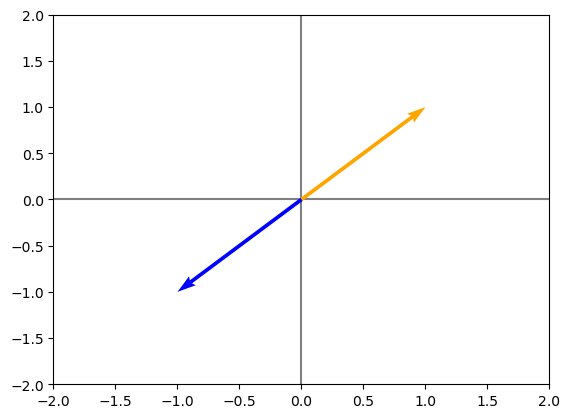

In [13]:
# Ejemplo de vectores linealmente independientes
vector1 = np.array([1, 1])
vector2 = np.array([-1, -1])

print(vector1 + vector2)
graficarVectores([vector1, vector2], ["orange", "blue"])

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

### Validar que una matriz tenga inversa

Para que un Sistema de Ecuaciones Lineales tenga solución, la matriz A que lo representa no tiene que tener vectores linealmente dependientes. Es decir, no tienen que haber filas y columnas que puedan ser escritas como combinación de otras filas o columnas; podemos utilizar los vectores y valores propios para esto.

In [15]:
# Matriz que representa el sistema de ecuaciones
A = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 1, 0],
    [1, 0, 0, 1]
])

# Sacamos los valores y vectores propios
valoresPropios, vectoresPropios = np.linalg.eig(A.T)
print(valoresPropios)
print(A[valoresPropios == 0, :])

[ 1.61803399 -0.61803399  0.          1.        ]
[[0 1 1 0]]


Vemos que la tercera fila es linealmente dependiente ya que podríamos escribirla como la suma de la fila uno y la fila 2.

### Norma


La norma es la longitud de un vector; mide la distancia del vector hasta el origen. La norma de un vector es mayor o igual a 0 y solo cuando el vector es 0 entonces su norma también lo será. Por otro lado, v1 + v2 = v3 → norma(v1) + norma(v2) >= norma(v3). norma(av) = a norma(v).

$\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

In [3]:
vector1 = np.array([2, 7])
vector2 = np.array([3, 5])
print(np.linalg.norm(vector1))
print(np.linalg.norm(vector2))

7.280109889280518
5.830951894845301


### Tipos de norma

La norma se usa en Machine Learning para encontrar errores y se le suele denotar por la letra $L$.

- **$L_0$**: devuelve la cantidad de elementos del vector diferentes a 0.
- **$L_1$**: devuelve la suma de los valores absolutos de los elementos del vector.
- **$L_2$**: devuelve la magnitud (distancia euclidiana) o longitud del vector desde el origen.
- **$(L_{2})^2$**: devuelve la magnitud (distancia euclidiana) al cuadrado; es más fácil de hacer ya que es el producto punto de un vector por sí mismo.
- **$L_\infty$**: devuelve el valor absoluto más grande del vector.

In [5]:
# ord corresponde a el orden de la norma
print(np.linalg.norm(vector1, ord = 0))
print(np.linalg.norm(vector1, ord = 1))
print(np.linalg.norm(vector1))
print(np.linalg.norm(vector1, ord = 2))
print(np.linalg.norm(vector1, ord = 2) ** 2)
print(vector1.T.dot(vector1))
print(np.linalg.norm(vector1, ord = np.Inf))

2.0
9.0
7.280109889280518
7.280109889280518
53.0
53
7.0


### Producto punto en función de la norma

El producto punto de dos vectores es numéricamente igual a la multiplicación de las normas (de orden 2) de estos vectores por el coseno que forman: $$v_1 * v_2 = L_2(v_1)* L_2(v_2) * \cos(\alpha)$$

In [6]:
vector1 = np.array([0, 3])
vector2 = np.array([3, 3])

vector1.T.dot(vector2)

9

In [7]:
norma1 = np.linalg.norm(vector1)
norma2 = np.linalg.norm(vector2)

# np.cos() solo acepta radianes así que podemos pasar de grados a radianes con np.deg2rad()
norma1 * norma2 * np.cos(np.deg2rad(45))

9.0

#### ¿Por qué nos interesa conocer el ángulo entre dos vectores?

En Machine Learning se utiliza la similitud coseno: entre más pequeño sea el ángulo entre dos vectores más similares son.

### Matriz diagonal

Una matriz diagonal es aquella que solo tiene números en su diagonal y el resto son ceros. Al multiplicar una matriz diagonal por un vector lo que se está haciendo es una ponderación de los elementos del vector.

In [2]:
matrizDiagonal = np.diag([1, 2, 3, 4, 5])
vector = np.array([1, 1, 1, 1, 1])
print(matrizDiagonal)
print(matrizDiagonal.dot(vector.T))

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
[1 2 3 4 5]


Calcular la inversa de una matriz diagonal es tan fácil como crear otra matriz diagonal donde sus elementos estén invertidos respecto a la original, o sea, $1 / x$

In [3]:
np.linalg.inv(matrizDiagonal)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        ,  0.        ],
       [-0.        , -0.        , -0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

### Matriz simétrica

Una matriz simétrica es aquella que al realizar su transpuesta el resultado es la misma matriz. Cumplen que siendo $A$ y $B$ matrices simétricas entonces $(A * B) ^ T = B * A$

In [7]:
matrizSimetrica = np.array([
    [1, 2, 3],
    [2, -1, 7],
    [3, 7, 11]
])
print(matrizSimetrica, matrizSimetrica.T, sep = "\n\n")

[[ 1  2  3]
 [ 2 -1  7]
 [ 3  7 11]]

[[ 1  2  3]
 [ 2 -1  7]
 [ 3  7 11]]


### Vectores ortogonales

**Un vector por sí mismo no puede ser ortogonal ya que debe hacer referencia a otro valor**.

Ser ortogonal significa que el ángulo que se forma entre dos vectores es de $90^\degree$.

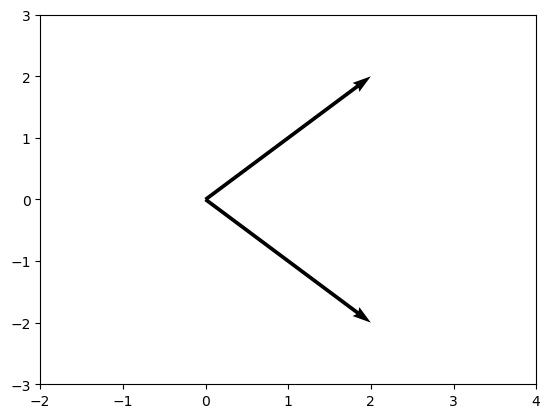

In [10]:
A = np.array([0, 0, 2, 2])
B = np.array([0, 0, 2, -2])

plt.quiver([A[0], B[0]],
          [A[1], B[1]],
          [A[2], B[2]],
          [A[3], B[3]],
           angles = 'xy', scale_units = 'xy', 
           scale = 1,
          )
plt.xlim(-2,4)
plt.ylim(-3,3)

plt.show() 

Si el producto punto de dos vectores es 0 entonces son ortogonales.

In [11]:

v1 = np.array([2, 2])
v2 = np.array([2, -2])

print(v1.dot(v2.T)) # Si es igual a 0 es porque tienen 90 grados.

0


El máximo número de vectores ortogonales entre sí está dado por la dimensión del espacio en el que estamos trabajando.

### Vector ortonormal

Es un vector ortogonal cuya norma es igual a 1.

In [12]:
vectorOrtonormal = v1 * (1 /np.linalg.norm(v1))
print(np.linalg.norm(vectorOrtonormal))

0.9999999999999999


### Matriz ortogonal

Una matriz es ortogonal cuando todas sus filas son mutuamente ortonormales y todas sus columnas son mutuamente ortonormales.
Así mismo, una matriz ortogonal es una matriz cuadrada cuya matriz inversa coincide con su matriz transpuesta.
$A^T * A = A * A^T = I$; $A^T = A^{-1}$

### Traza

La traza se define como la suma de los elementos de la diagonal principal. Tiene la propiedad de no cambiar ante un cambio de base.

In [13]:
matriz = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

traza = np.trace(matriz)
print(traza)

15


### Determinante

Es un valor numérico que nos da información de la transformación que produce una matriz en su espacio. En el caso de un plano nos dice cómo varían las áreas en el plano.

El valor absoluto del determinante está relacionado con la ampliación de ese espacio al aplicar la matriz.

Si un determinante es negativa nos indica que la trasformación rotó el espacio $180^\degree$, si fuese positiva nos indica que no rota o que rota $360^\degree$

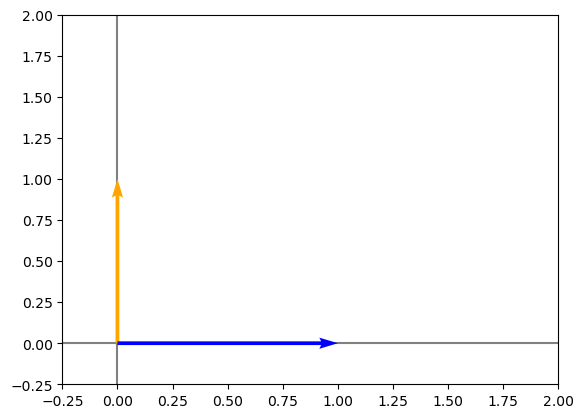

In [16]:
vector1 = np.array([0, 1])
vector2 = np.array([1, 0])

graficarVectores([vector1, vector2], ["orange", "blue"])
plt.xlim(-0.25, 2)
plt.ylim(-0.25, 2)
plt.show()


Si por ejemplo utilizamos la siguiente matriz sin cambiar los vectores originales lo que esperamos es que se duplique la longitud de los vectores.

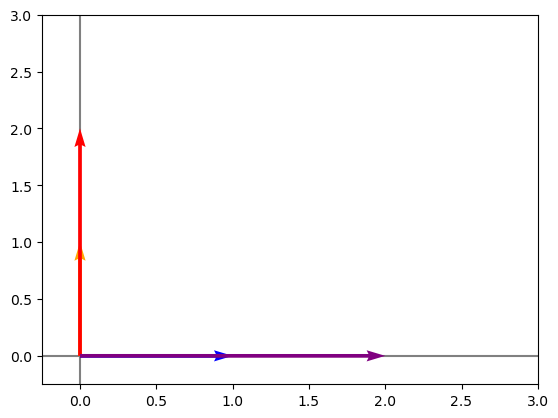

In [18]:
A = np.array([
    [2, 0],
    [0, 2]
])

vector1Transformado = A.dot(vector1)
vector2Transformado = A.dot(vector2)

graficarVectores([vector1, vector2, vector1Transformado, vector2Transformado], ["orange", "blue", "red", "purple"])
plt.xlim(-0.25, 3)
plt.ylim(-0.25, 3)
plt.show()

In [19]:
determinanteA = np.linalg.det(A)
determinanteA

4.0

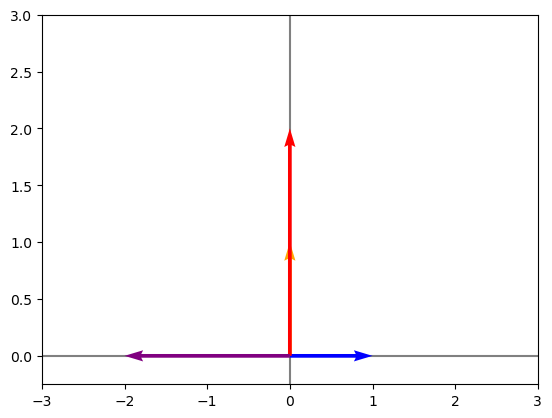

In [21]:
A = np.array([
    [-2, 0],
    [0, 2]
])

vector1Transformado = A.dot(vector1)
vector2Transformado = A.dot(vector2)

graficarVectores([vector1, vector2, vector1Transformado, vector2Transformado], ["orange", "blue", "red", "purple"])
plt.xlim(-3, 3)
plt.ylim(-0.25, 3)
plt.show()

In [22]:
determinanteA = np.linalg.det(A)
determinanteA

-4.0